In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Mba notes\novels\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
len(df)

7043

In [4]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [ ]:
pd.to_numeric(df.TotalCharges,errors="coerce")

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()].shape

In [ ]:
df.iloc[488]

In [8]:
df.iloc[488]["TotalCharges"]

' '

In [9]:
df1=df[df.TotalCharges!=" "]
df1.shape

(7032, 21)

In [10]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Mba notes\novels\Anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
df1.TotalCharges.dtypes

dtype('float64')

In [13]:
np.mean(df1[df1.Churn=="No"].tenure)

37.65000968429208

In [14]:
tenure_churn_no=df1[df1.Churn=="No"].tenure
tenure_churn_yes=df1[df1.Churn=="Yes"].tenure

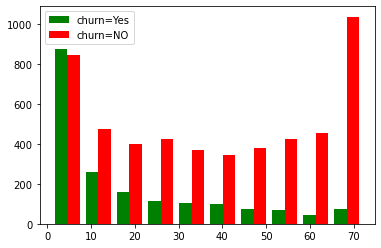

In [15]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=["green","red"],label=["churn=Yes","churn=NO"])
plt.legend(loc="best")

In [16]:
monthy_churn_no=df1[df1.Churn=="No"].MonthlyCharges
monthy_churn_yes=df1[df1.Churn=="Yes"].MonthlyCharges

(array([[1452.,  134.,  246.,  485.,  419.,  544.,  597.,  550.,  485.,
          251.],
        [ 148.,   57.,  119.,  152.,   53.,  350.,  355.,  319.,  273.,
           43.]]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 2 Lists of Patches objects>)

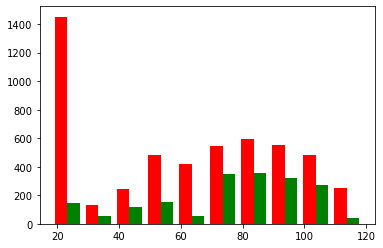

In [17]:
plt.hist([monthy_churn_no,monthy_churn_yes],color=["red","green"])

In [18]:
def print_unique_colvalues(df):
    for i in df:
        if df[i].dtypes=="object":
            print(f"{i}:{df[i].unique()}")
    
       

In [19]:
 print_unique_colvalues(df1)

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [20]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)

C:\Mba notes\novels\Anaconda\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [21]:
 print_unique_colvalues(df1)

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [22]:
df2=df1.replace({
    "Yes":1,
    "No":0
})
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [23]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
 for col in df2:
        print(f"{col}:{df2[col].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [25]:
df2["gender"].replace({
    "Male":0,
    "Female":1
},inplace=True)

In [26]:
df2["gender"].unique()

array([1, 0], dtype=int64)

In [27]:
df3=pd.get_dummies(data=df2,columns=['InternetService',"Contract","PaymentMethod"])
df3.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df3.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6141,5385-SUIRI,0,1,1,0,52,1,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1792,8401-EMUWF,0,0,1,1,42,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
5265,4274-DRSQT,1,0,0,0,66,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0


In [29]:
df3.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL            

In [30]:
 col_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler=MinMaxScaler()

In [32]:
df3[col_to_scale]=scaler.fit_transform(df3[col_to_scale])

In [33]:
df3

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,0.000000,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,0.464789,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,0.014085,1,0,1,1,...,0,1,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,0.619718,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,0.014085,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,0.323944,1,1,1,0,...,0,1,0,0,1,0,0,0,0,1
7039,2234-XADUH,1,0,1,1,1.000000,1,1,0,1,...,0,0,1,0,1,0,0,1,0,0
7040,4801-JZAZL,1,0,1,1,0.140845,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
7041,8361-LTMKD,0,1,1,0,0.042254,1,1,0,0,...,0,0,1,1,0,0,0,0,0,1


In [34]:
for col in df3:
    print(f"{col}:{df3[col].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLin

In [35]:
x=df3.drop(['Churn',"customerID"],axis='columns')
y=df3['Churn']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [37]:
x_train.shape

(5625, 26)

In [38]:
x_test.shape

(1407, 26)

In [39]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [40]:
len(x_train.columns)

26

In [41]:
import tensorflow as tf 
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(5,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5381 - accuracy: 0.7365
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.7913
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.7972
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.7998
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4162 - accuracy: 0.8011
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4118 - accuracy: 0.8055
Epoch 8/100
176/176 [==============================] - ETA: 0s - loss: 0.4103 - accuracy: 0.80 - 1s 3ms/step - loss: 0.4095 - accuracy: 0.8071
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.8101
Epoch 10/100
176/176 [===========================

Epoch 81/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3559 - accuracy: 0.8334
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3551 - accuracy: 0.8329
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3552 - accuracy: 0.8299
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3549 - accuracy: 0.8320
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8338
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8308
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3534 - accuracy: 0.8347: 0s - loss: 0.3400 - ac
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.8340
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8343
Epoch 90/100
176/176 [==============================] - 1s

In [42]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.7733


[0.48510733246803284, 0.7732764482498169]

In [43]:
yp=model.predict(x_test)
yp[:5]

array([[0.30100852],
       [0.4855926 ],
       [0.00138476],
       [0.92747694],
       [0.38600975]], dtype=float32)

In [44]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [45]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [46]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       999
           1       0.63      0.53      0.58       408

    accuracy                           0.77      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.76      0.77      0.77      1407



Text(69.0, 0.5, 'truth')

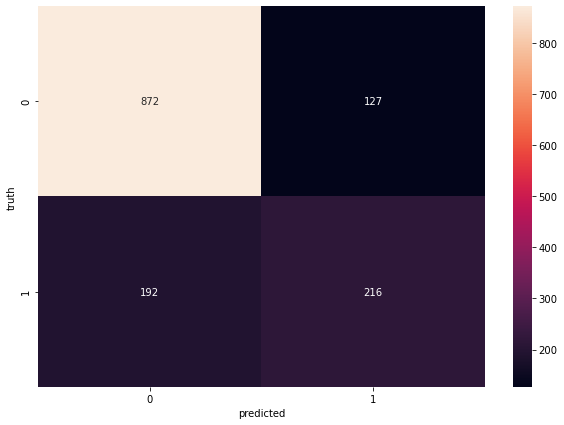

In [48]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")

plt.xlabel("predicted")
plt.ylabel("truth")

In [49]:
def ANN(x_train,y_train,x_test,y_test,loss,weights):
    model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(5,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])
    model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
    if weights==-1:
        model.fit(x_train,y_train,epochs=100)
    else:
        model.fit(x_train,y_train,epochs=100)
    print(model.evaluate(x_test,y_test))
    y_pred=model.predict(x_test)
    y_pred=np.round(y_pred)
    print(classification_report(y_test,y_pred))
    return y_pred

In [50]:
ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5004 - accuracy: 0.7470
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4357 - accuracy: 0.7888
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.7988
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4174 - accuracy: 0.8007
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4139 - accuracy: 0.8048
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4090 - accuracy: 0.8060
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4075 - accuracy: 0.8087
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4058 - accuracy: 0.8119
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4039 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3646 - accuracy: 0.8322
Epoch 81/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3647 - accuracy: 0.8324
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3671 - accuracy: 0.8318
Epoch 83/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3632 - accuracy: 0.8329
Epoch 84/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.8320: 0s - loss: 0.3690 - accuracy: 0.82
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3636 - accuracy: 0.8316
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3628 - accuracy: 0.8318
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3624 - accuracy: 0.8311
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3618 - accuracy: 0.8320
Epoch 89/100
176/176 [==============================] - 1s 

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

# Undersampling

In [71]:
df3=df3.drop("customerID",axis=1)

In [78]:

count_class_0,count_class_1=df3.Churn.value_counts()
df_class_0=df3[df3["Churn"]==0]
df_class_1=df3[df3["Churn"]==1]

In [79]:

df3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [80]:
df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
print("Random under Sampling: ")
print(df_test_under.Churn.value_counts())

Random under Sampling: 
1    1869
0    1869
Name: Churn, dtype: int64


In [81]:
x=df_test_under.drop("Churn",axis="columns")
y=df_test_under["Churn"]

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [83]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [84]:
y_pred=ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.5599
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.7428
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7582
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7602
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.7656
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7719
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7766
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7696
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4028 - accuracy: 0.8043
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.8070
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4010 - accuracy: 0.8070
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4010 - accuracy: 0.8057
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3998 - accuracy: 0.8114
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3983 - accuracy: 0.8110
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.8094
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3972 - accuracy: 0.8100
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3959 - accuracy: 0.8064
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8130
Epoch 93/100


# OverSampling

In [89]:
count_class_0,count_class_1

(5163, 1869)

In [127]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
print(df_test_over.Churn.value_counts())

1    5163
0    5163
Name: Churn, dtype: int64


In [129]:
x=df_test_over.drop("Churn",axis="columns")
y=df_test_over["Churn"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [130]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [131]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [132]:
y_pred=ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.7252
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7588
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7669
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7677
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7705
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7731
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7736
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7745
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.7741
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4628 - accura

259/259 [==============================] - 1s 3ms/step - loss: 0.3990 - accuracy: 0.8137
Epoch 81/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8137
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3991 - accuracy: 0.8133
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8119
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3988 - accuracy: 0.8145
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3978 - accuracy: 0.8162
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8137
Epoch 87/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3970 - accuracy: 0.8160
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8174
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3972 - accuracy: 

# SMOTE(synthetic minority oversampling technique)

In [137]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")
x_sm,y_sm=smote.fit_sample(x,y)

In [139]:
y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [141]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [142]:
y_pred=ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
259/259 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.7053
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.7574
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5539 - accuracy: 0.7588
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.7642
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7671
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7682
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.7729
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7765
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7749
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4935 - accura

259/259 [==============================] - 1s 3ms/step - loss: 0.4117 - accuracy: 0.8102
Epoch 79/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8122
Epoch 80/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4118 - accuracy: 0.8142
Epoch 81/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.8166
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4081 - accuracy: 0.8149
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4093 - accuracy: 0.8142
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4092 - accuracy: 0.8165
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4071 - accuracy: 0.8138
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4065 - accuracy: 0.8169
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4072 - accuracy: 

# Using Ensemble

# Bank Customer Churn

In [4]:
data=pd.read_csv(r"C:\Mba notes\novels\bank_customer_Churn_Modelling.csv")

In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [127]:
df1=data.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [128]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [129]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()

In [130]:
df1["Gender"]=a.fit_transform(df1.Gender)

In [131]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [132]:
a=df1[df1["Exited"]==1].Geography
b=df1[df1["Exited"]==0].Geography


(array([[ 810.,    0.,    0.,    0.,    0.,  413.,    0.,    0.,    0.,
          814.],
        [4204.,    0.,    0.,    0.,    0., 2064.,    0.,    0.,    0.,
         1695.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 2 Lists of Patches objects>)

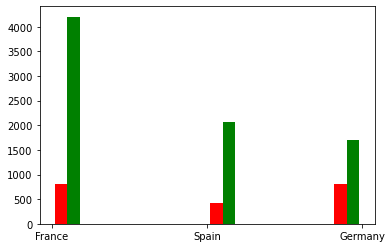

In [133]:
plt.hist([a,b],color=["red","green"])

(array([[  95.,  232.,  201.,  213.,  203.,  209.,  196.,  177.,  197.,
          314.],
        [ 318.,  803.,  847.,  796.,  786.,  803.,  771.,  851.,  828.,
         1160.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 Lists of Patches objects>)

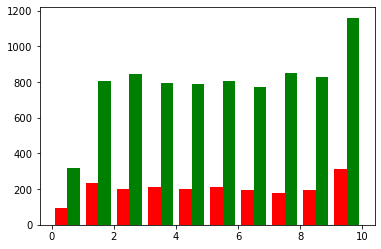

In [134]:
a=df1[df1["Exited"]==1].Tenure
b=df1[df1["Exited"]==0].Tenure
plt.hist([a,b],color=["red","green"])

(array([[198., 196., 191., 212., 196., 211., 196., 206., 225., 206.],
        [789., 772., 815., 815., 806., 816., 811., 776., 784., 779.]]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <a list of 2 Lists of Patches objects>)

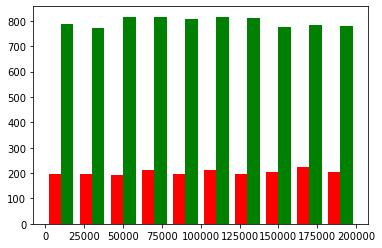

In [135]:
a=df1[df1["Exited"]==1].EstimatedSalary
b=df1[df1["Exited"]==0].EstimatedSalary
plt.hist([a,b],color=["red","green"])

In [136]:
df1.dtypes

CreditScore          int64
Geography           object
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [137]:
df1["CreditScore"].quantile(1)

850.0

In [138]:
df1["CreditScore"].quantile(0.95)

812.0

In [139]:
df1.quantile(0.95)

CreditScore           812.0000
Gender                  1.0000
Age                    60.0000
Tenure                  9.0000
Balance            162711.6690
NumOfProducts           2.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary    190155.3755
Exited                  1.0000
Name: 0.95, dtype: float64

In [140]:
df1["Age"].quantile(0.99)

72.0

In [147]:
len(df1[df1["Age"]<18])

0

In [191]:
df2.isnull().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
NumOfProducts_1      0
NumOfProducts_2      0
NumOfProducts_3      0
NumOfProducts_4      0
dtype: int64

In [141]:
df1=df1[df1["Age"]<72]

In [150]:
len(df1)

9894

In [148]:
df1.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000
mean,650.418941,0.546493,38.526784,5.011825,76545.604574,1.530726,0.705579,0.510815,100154.402461,0.205478
std,96.716189,0.497859,9.812208,2.892243,62408.676531,0.582275,0.455805,0.499908,57495.687050,0.404071
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51112.885000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97267.100000,1.000000,1.000000,1.000000,100350.530000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127671.965000,2.000000,1.000000,1.000000,149395.882500,0.000000
max,850.000000,1.000000,71.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [166]:
df1["EstimatedSalary"].quantile(0.05)

9886.087000000001

In [167]:
len(df1[df1["EstimatedSalary"]<df1["EstimatedSalary"].quantile(0.05)])

495

In [180]:
df1=df1[df1["EstimatedSalary"]>df1["EstimatedSalary"].quantile(0.05)]

In [181]:
len(df1)

9399

In [182]:
df1.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000,9399.000000
mean,650.536653,0.547505,38.556442,5.028088,76884.670272,1.529950,0.707522,0.511118,105170.610309,0.205660
std,96.726277,0.497765,9.819784,2.892494,62399.119568,0.581999,0.454925,0.499903,54556.621390,0.404205
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9902.390000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,58326.485000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97530.250000,1.000000,1.000000,1.000000,104678.780000,0.000000
75%,718.000000,1.000000,44.000000,8.000000,127821.225000,2.000000,1.000000,1.000000,151894.970000,0.000000
max,850.000000,1.000000,71.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [183]:
from sklearn.preprocessing import OneHotEncoder

In [184]:
e=OneHotEncoder()

In [185]:
df2=pd.get_dummies(data=df1,columns=['Geography',"NumOfProducts"])
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [186]:
df2

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,1,0,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,1,0,96270.64,0,1,0,0,0,1,0,0
9996,516,1,35,10,57369.61,1,1,101699.77,0,1,0,0,1,0,0,0
9997,709,0,36,7,0.00,0,1,42085.58,1,1,0,0,1,0,0,0
9998,772,1,42,3,75075.31,1,0,92888.52,1,0,1,0,0,1,0,0


In [187]:
for col in df2:
    print(f"{col}:{df2[col].unique()}")

CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 587 726
 732 636 510 846 577 756 571 574 411 591 533 553 520 722 475 490 804 582
 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725 614 742
 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678 757 416 665
 777 543 506 750 729 646 647 808 524 769 730 515 773 814 710 623 670 622
 785 605 479 685 538 562 721 628 668 828 674 625 432 770 758 795 686 789
 589 461 584 663 682 793 691 485 650 754 535 716 539 706 586 631 717 800
 683 704 615 667 484 578 512 606 597 778 514 525 715 580 521 759 516 711
 618 643 671 689 620 676 572 695 807 592 567 694 547 594 610 767 763 712
 703 662 659 523 772 545 634 739 771 544 696 766 727 693 557 531 498 651
 791 733 811 707 714 782 775 799 602 744 588 747 583 681 511 627 731 629
 438 642 806 474 559 429 680 749 734 644 805 718 840 630 654 762 568 613
 522 737 648 443 640 540 460 593 801 611 802 745 483 690 492 709 705 560
 752 701 537 626 487 596 702 486 724 54

In [188]:
from sklearn.preprocessing import MinMaxScaler

In [189]:
s=MinMaxScaler()
df2[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]]=s.fit_transform(df2[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

In [190]:
df2

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0,0.452830,0.2,0.000000,1,1,0.481069,1,1,0,0,1,0,0,0
1,0.516,0,0.433962,0.1,0.334031,0,1,0.539956,0,0,0,1,1,0,0,0
2,0.304,0,0.452830,0.8,0.636357,1,0,0.547263,1,1,0,0,0,0,1,0
3,0.698,0,0.396226,0.1,0.000000,0,0,0.441497,0,1,0,0,0,1,0,0
4,1.000,0,0.471698,0.2,0.500246,1,1,0.363942,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.396226,0.5,0.000000,1,0,0.454354,0,1,0,0,0,1,0,0
9996,0.332,1,0.320755,1.0,0.228657,1,1,0.482915,0,1,0,0,1,0,0,0
9997,0.718,0,0.339623,0.7,0.000000,0,1,0.169305,1,1,0,0,1,0,0,0
9998,0.844,1,0.452830,0.3,0.299226,1,0,0.436562,1,0,1,0,0,1,0,0


In [208]:
x=df2.drop("Exited",axis=1)
y=df2.Exited
z=df2.drop(["Exited","Geography_France","Geography_Germany","Geography_Spain"],axis=1)

In [237]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [238]:
x_train.shape

(7519, 15)

In [239]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(15,)),
    keras.layers.Dense(5,activation="relu"),
    keras.layers.Dense(2,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
with tf.device("/GPU:0"):
    model.fit(x_train,y_train,epochs=100)

Epoch 1/100
235/235 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7843
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.7939
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8115
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8339
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8445
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8459
Epoch 7/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8479
Epoch 8/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8479
Epoch 9/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8467
Epoch 10/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3659 - accura

In [240]:
model.evaluate(x_train,y_train)

235/235 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8606


[0.3478001654148102, 0.8606197834014893]

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score



In [222]:
cross_val_score(LogisticRegression(),x_train,y_train)

array([0.83444149, 0.83776596, 0.85638298, 0.84640957, 0.84830339])

In [224]:
cross_val_score(LinearRegression(),x_train,y_train)

array([0.27888096, 0.27612836, 0.31261532, 0.29312461, 0.27009827])

In [226]:
cross_val_score(DecisionTreeClassifier(),x_train,y_train)

array([0.77992021, 0.79454787, 0.79787234, 0.79055851, 0.78908849])